# Section 8

## Sampling Methods

### Ideal Sampling Method

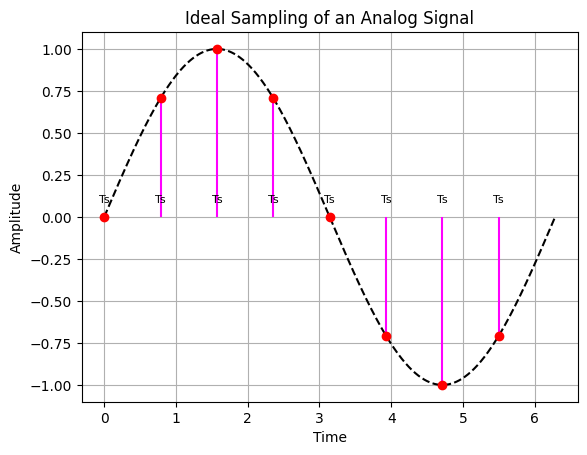

In [22]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 2 * np.pi, 1000)

analog_signal = np.sin(t)

Ts = np.pi / 4

sample_times = np.arange(0, 2 * np.pi, Ts)
samples = np.sin(sample_times)

plt.plot(t, analog_signal, label='Analog signal', linestyle='--', color='black')

plt.stem(sample_times, samples, basefmt=" ", linefmt='magenta', markerfmt='ro')

for i in range(len(sample_times)):
    plt.annotate(f'Ts', (sample_times[i], 0), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Ideal Sampling of an Analog Signal')
plt.grid(True)

plt.show()


### Natural Sampling Method

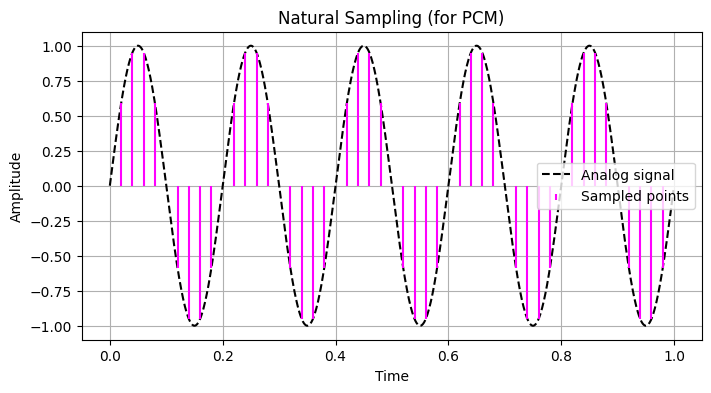

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Time settings
fs = 1000  # Sampling frequency
f = 5  # Frequency of the analog signal (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # Time axis

# Analog signal (sine wave)
analog_signal = np.sin(2 * np.pi * f * t)

# Natural sampling: Sampling with a continuous approximation
sampling_frequency = 50  # Lower sampling frequency for visualization
t_sampled = np.arange(0, 1, 1/sampling_frequency)
sampled_signal = np.sin(2 * np.pi * f * t_sampled)

# Plotting the analog signal and natural sampling
plt.figure(figsize=(8, 4))
plt.plot(t, analog_signal, 'k--', label="Analog signal")
plt.stem(t_sampled, sampled_signal, linefmt='magenta', markerfmt=' ', basefmt=' ', label="Sampled points")

# Labels and title
plt.title('Natural Sampling (for PCM)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


### Flat-top Sampling Method

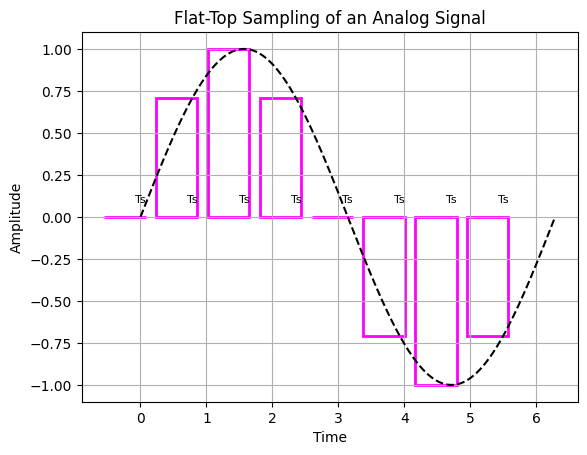

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Time axis from 0 to 2pi
t = np.linspace(0, 2 * np.pi, 1000)
# Analog signal: A sine wave
analog_signal = np.sin(t)

# Sampling period (Ts)
Ts = np.pi / 4
# Sample points
sample_times = np.arange(0, 2 * np.pi, Ts)
samples = np.sin(sample_times)

# Plot the analog signal
plt.plot(t, analog_signal, label='Analog signal', linestyle='--', color='black')

# Flat-top sampled signal as outlined bars with spacing
flat_top_width = Ts * 0.8  # Width of the flat-top region, reduced for spacing
spacing = Ts * 0.2  # Space between bars

# Adjust the positions to add space
bar_positions = sample_times - (flat_top_width / 2) + (spacing / 2)

# Create outlined bars
plt.bar(bar_positions, samples, width=flat_top_width, 
         edgecolor='magenta', facecolor='none', linewidth=2)

# Annotating the sample points
for i in range(len(sample_times)):
    plt.annotate(f'Ts', (sample_times[i], 0), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)

# Labels and Title
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Flat-Top Sampling of an Analog Signal')
plt.grid(True)

# Show the plot
plt.show()


## Quantization 

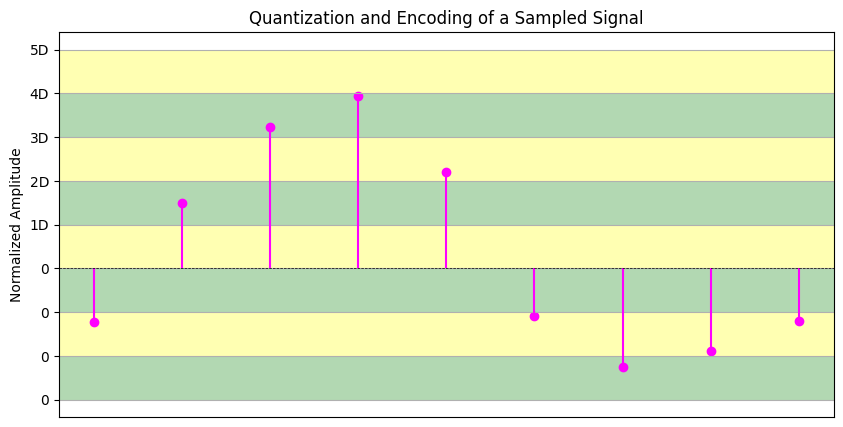

In [67]:
import matplotlib.pyplot as plt
import numpy as np

signal_values = [-6.1, 7.5, 16.2, 19.7, 11.0, -5.5, -11.3, -9.4, -6.0]

x = np.arange(len(signal_values))

plt.figure(figsize=(10, 5))

y_min = int(np.floor(min(signal_values)) // 5 * 5)
y_max = int(np.ceil(max(signal_values)) + 5)

for i in range(y_min, y_max, 5):
    color = 'yellow' if (i // 5) % 2 == 0 else 'green'
    plt.axhspan(i, i + 5, facecolor=color, alpha=0.3)

for i, value in enumerate(signal_values):
    plt.vlines(x[i], 0, value, color='magenta')  
    plt.scatter(x[i], value, color='magenta', marker='o')  

plt.title('Quantization and Encoding of a Sampled Signal')
plt.ylabel('Normalized Amplitude')

yticks = np.arange(y_min, y_max + 1, 5)  
ytick_labels = [f"{i // 5}D" if i > 0 else "0" for i in yticks]  
plt.yticks(yticks, ytick_labels)  
plt.xticks([])

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  
plt.grid()

plt.show()


## Binary Encoding 

## Example 5

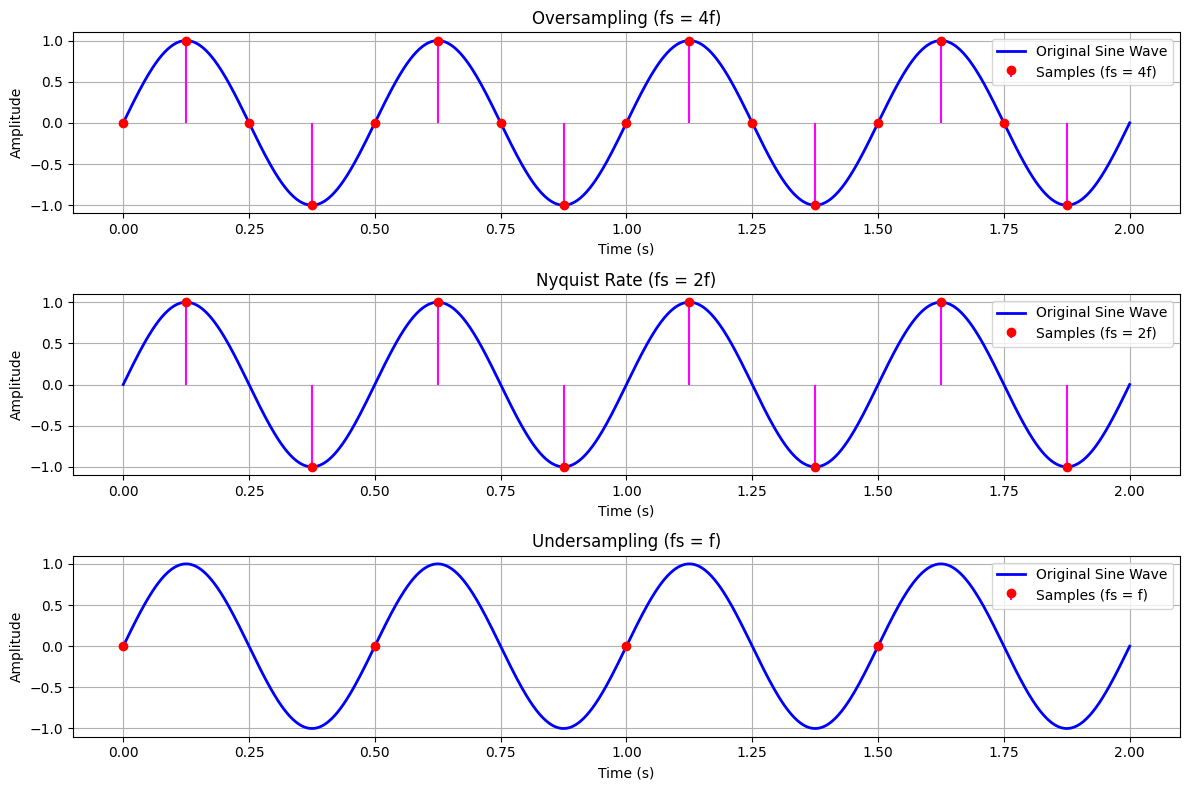

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
f = 2  # Frequency of the sine wave (2 Hz)
t = np.linspace(0, 2, 1000)  # Time from 0 to 2 seconds

# Original sine wave
original_signal = np.sin(2 * np.pi * f * t)

# Sampling frequencies
fs_oversample = 4 * f  # Oversampling: fs = 4f
fs_nyquist = 2 * f     # Nyquist rate: fs = 2f
fs_undersample = f     # Undersampling: fs = f

# Adjusted Nyquist sampling times (quarter-period intervals)
T = 1 / f  # Period
t_oversample = np.arange(0, 2, 1/fs_oversample)
t_nyquist = np.arange(0.125, 2, T/2)  # Sampling at every half-period
t_undersample = np.arange(0, 2, 1/fs_undersample)

# Sampled signals
sampled_oversample = np.sin(2 * np.pi * f * t_oversample)
sampled_nyquist = np.sin(2 * np.pi * f * t_nyquist)
sampled_undersample = np.sin(2 * np.pi * f * t_undersample)

# Plotting
plt.figure(figsize=(12, 8))

# Original Signal with Oversampling
plt.subplot(3, 1, 1)
plt.plot(t, original_signal, label='Original Sine Wave', color='blue', linewidth=2)
plt.stem(t_oversample, sampled_oversample, linefmt='magenta', markerfmt='ro', basefmt=' ', label='Samples (fs = 4f)')
plt.title('Oversampling (fs = 4f)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

# Nyquist Rate with adjusted sampling points (half-period)
plt.subplot(3, 1, 2)
plt.plot(t, original_signal, label='Original Sine Wave', color='blue', linewidth=2)
plt.stem(t_nyquist, sampled_nyquist, linefmt='magenta', markerfmt='ro', basefmt=' ', label='Samples (fs = 2f)')
plt.title('Nyquist Rate (fs = 2f)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

# Undersampling
plt.subplot(3, 1, 3)
plt.plot(t, original_signal, label='Original Sine Wave', color='blue', linewidth=2)
plt.stem(t_undersample, sampled_undersample, linefmt='magenta', markerfmt='ro', basefmt=' ', label='Samples (fs = f)')
plt.title('Undersampling (fs = f)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


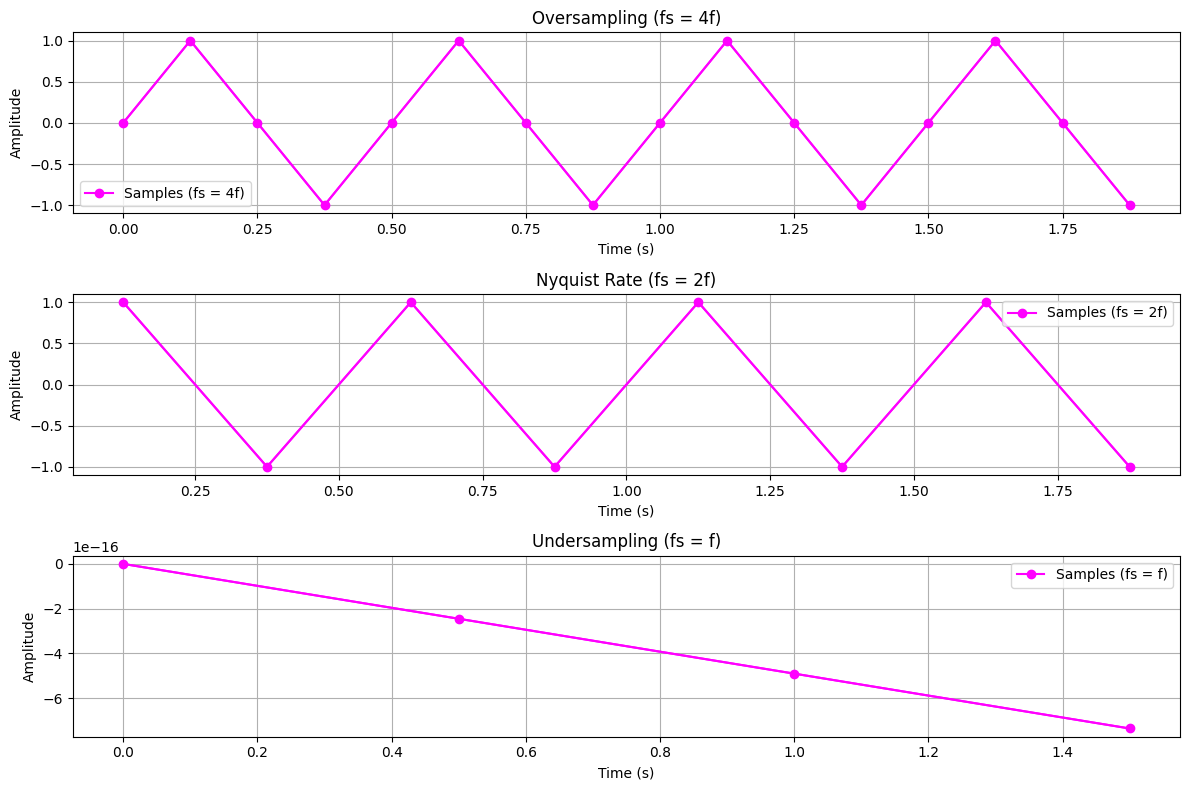

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
f = 2  # Frequency of the sine wave (1 Hz)
t = np.linspace(0, 2, 1000)  # Time from 0 to 2 seconds

# Sampling frequencies
fs_oversample = 4 * f  # Oversampling: fs = 4f
fs_nyquist = 2 * f     # Nyquist rate: fs = 2f
fs_undersample = f     # Undersampling: fs = f

# Sampling times
t_oversample = np.arange(0, 2, 1/fs_oversample)
t_nyquist = np.arange(0.125, 2, 1/fs_nyquist)
t_undersample = np.arange(0, 2, 1/fs_undersample)

# Sampled signals
sampled_oversample = np.sin(2 * np.pi * f * t_oversample)
sampled_nyquist = np.sin(2 * np.pi * f * t_nyquist)
sampled_undersample = np.sin(2 * np.pi * f * t_undersample)

# Plotting
plt.figure(figsize=(12, 8))

# Oversampling
plt.subplot(3, 1, 1)
plt.plot(t_oversample, sampled_oversample, marker='o', color='magenta', label='Samples (fs = 4f)')
plt.plot(t_oversample, sampled_oversample, linestyle='-', color='magenta')  # Connect dots
plt.title('Oversampling (fs = 4f)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

# Nyquist Rate
plt.subplot(3, 1, 2)
plt.plot(t_nyquist, sampled_nyquist, marker='o', color='magenta', label='Samples (fs = 2f)')
plt.plot(t_nyquist, sampled_nyquist, linestyle='-', color='magenta')  # Connect dots
plt.title('Nyquist Rate (fs = 2f)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

# Undersampling
plt.subplot(3, 1, 3)
plt.plot(t_undersample, sampled_undersample, marker='o', color='magenta', label='Samples (fs = f)')
plt.plot(t_undersample, sampled_undersample, linestyle='-', color='magenta')  # Connect dots
plt.title('Undersampling (fs = f)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


## Example 6

In [42]:
max_frequency = 4000  # Hz

sampling_rate = 2 * max_frequency  # Nyquist rate

print("Maximum Frequency:", max_frequency, "Hz")
print("Calculated Sampling Rate:", sampling_rate, "Hz")


Maximum Frequency: 4000 Hz
Calculated Sampling Rate: 8000 Hz


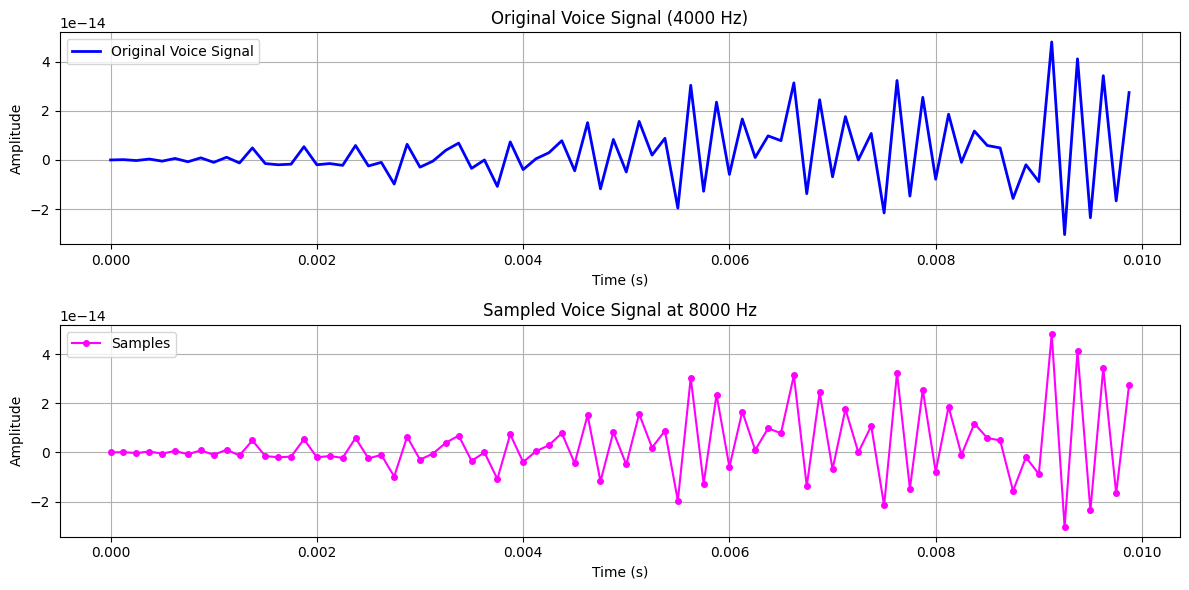

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
f = 4000  # Maximum frequency for voice (4000 Hz)
sampling_rate = 8000  # Sampling rate (8000 samples per second)
duration = 0.01  # Duration of the signal in seconds (10 ms)

# Time array for original signal
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Original voice signal (sine wave)
original_signal = np.sin(2 * np.pi * f * t)

# Sampling times
t_samples = np.arange(0, duration, 1/sampling_rate)

# Sampled signal (should be the same as original since we sample at 8000 Hz)
sampled_signal = np.sin(2 * np.pi * f * t_samples)

# Plotting
plt.figure(figsize=(12, 6))

# Original Signal
plt.subplot(2, 1, 1)
plt.plot(t, original_signal, label='Original Voice Signal', color='blue', linewidth=2)
plt.title('Original Voice Signal (4000 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

# Sampled Signal
plt.subplot(2, 1, 2)
plt.plot(t_samples, sampled_signal, marker='o', color='magenta', label='Samples', linestyle='-', markersize=4)
plt.title('Sampled Voice Signal at 8000 Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


## Example 7

In [45]:
bandwidth = 200e3  

sampling_rate = 2 * bandwidth  

print("Bandwidth:", bandwidth, "Hz")
print("Minimum Sampling Rate:", sampling_rate, "Hz")

Bandwidth: 200000.0 Hz
Minimum Sampling Rate: 400000.0 Hz


## Example 8

In [47]:
bandwidth = 200e3  # 200 kHz

lower_frequency = None  
upper_frequency = None  

if lower_frequency is None or upper_frequency is None:
    print("Cannot calculate the minimum sampling rate because the frequency range is unknown.")
else:
    sampling_rate = 2 * upper_frequency
    print("The minimum sampling rate is:", sampling_rate, "Hz")


Cannot calculate the minimum sampling rate because the frequency range is unknown.


## Example 9

In [48]:
max_frequency = 4000  
bits_per_sample = 8   

sampling_rate = max_frequency * 2
bit_rate = sampling_rate * bits_per_sample

print(f"Sampling Rate: {sampling_rate} samples/s")
print(f"Bit Rate: {bit_rate} bps ({bit_rate / 1000} kbps)")


Sampling Rate: 8000 samples/s
Bit Rate: 64000 bps (64.0 kbps)


## Decoder

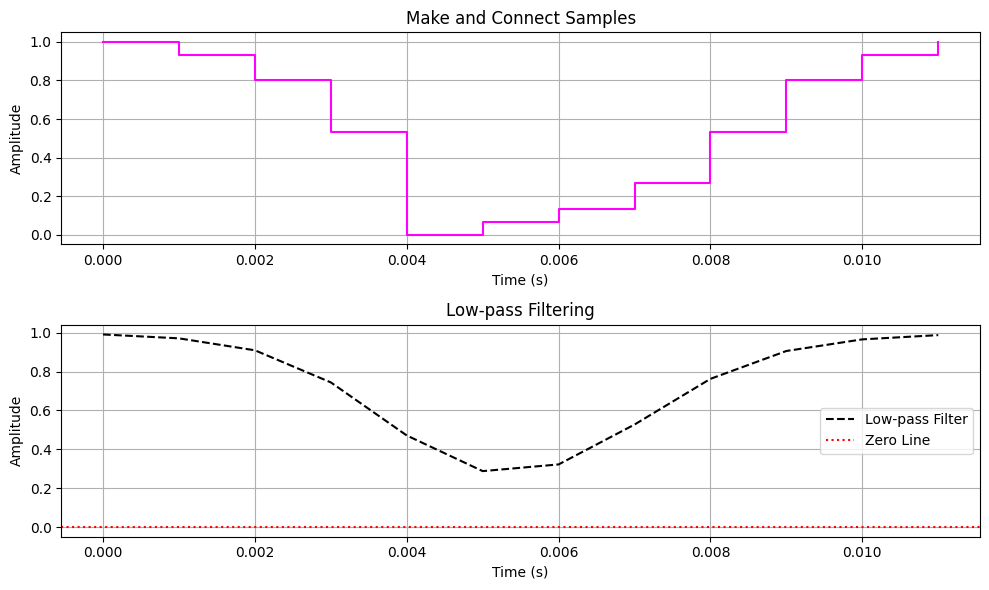

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

def pcm_decoder(binary_data, levels, sampling_rate):
    sample_values = np.array([int(b, 2) for b in binary_data])
    samples = (sample_values - np.min(sample_values)) / (np.max(sample_values) - np.min(sample_values))
    time = np.linspace(0, len(samples) / sampling_rate, len(samples), endpoint=False)
    return time, samples

# Function to apply a low-pass filter to smooth the signal
def low_pass_filter(signal, cutoff_freq, sampling_rate):
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(1, normal_cutoff, btype='low', analog=False)
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

# S-shaped function to create an S-curve effect
def s_shaped_function(x):
    return 1 / (1 + np.exp(-10 * (x - 0.5)))  # Adjust parameters for steepness and shift

# Modified binary data for the desired waveform
binary_data = [
    '1111', '1110', '1100', '1000', '0000', 
    '0001', '0010', '0100', '1000', '1100', 
    '1110', '1111'
]

# Define parameters
sampling_rate = 1000  # Samples per second
levels = 16           # Number of possible amplitude levels
cutoff_freq = 50      # Cutoff frequency for the low-pass filter

# Decode binary data to samples
time, samples = pcm_decoder(binary_data, levels, sampling_rate)

# Apply low-pass filter to get the analog signal
filtered_signal = low_pass_filter(samples, cutoff_freq, sampling_rate)

# Create S-shaped signal
s_shape_signal = s_shaped_function(filtered_signal)

# Scale to the range of [-1, 1]
s_shape_signal = s_shape_signal * 2 - 1

# Plot the results
plt.figure(figsize=(10, 6))

# Plot the sampled signal (stair-step)
plt.subplot(2, 1, 1)
plt.step(time, samples, where='post', label="Sampled Signal", color='magenta')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Make and Connect Samples')
plt.grid(True)

# Plot the S-shaped analog signal
plt.subplot(2, 1, 2)
plt.plot(time, s_shape_signal, label="Low-pass Filter", color='black', linestyle='--')
plt.axhline(0, color='red', linestyle=':', label='Zero Line')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Low-pass Filtering')
plt.grid(True)

plt.tight_layout()
plt.legend()
plt.show()
